In [20]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def dipole_func(x, u, fwhm):
    sigma = fwhm / np.sqrt(8 * np.log(2))
    y = 1 / sigma / np.sqrt(2 * np.pi) * ( np.exp( - 1 / 2 * (x - u)**2 / sigma**2 ) - np.exp( - 1 / 2 * x**2 / sigma**2 ) )
    return y

def dipole_mul_x_func(x, u, fwhm):
    return dipole_func(x, u, fwhm) * x

def plot_res_vs_fwhm(u_arr, ax):
    color_ls = ['r', 'orange', 'g', 'cyan', 'blue', 'purple', 'k']
    for idx, fwhm in enumerate(np.arange(3, 10)):
        pos_res_ls = []
        for u in u_arr:
            pos_sum, _ = quad(dipole_func, u / 2, float('inf'), args=(u , fwhm))
            pos_res_ls.append(pos_sum)
        ax.plot(u_arr, pos_res_ls, color=color_ls[idx], label = f'FWHM: {fwhm}')    
    ax.set_xlabel('Pixel Seperation', size=14)
    ax.set_ylabel('Fraction of Positive Flux to Total Flux', size=14)
    ax.axhline(y=0.01, color='gray', label = 'y=0.01')
    ax.legend(fontsize=12)
    
def plot_peak_x(u_arr, ax, show_legend=True):
    color_ls = ['r', 'orange', 'g', 'cyan', 'blue', 'purple', 'k']
    x_arr = np.arange(-20, 20, 0.001)
    for idx, fwhm in enumerate(np.arange(3, 10)):
        peak_pos_x_ls = []
        peak_neg_x_ls = []
        for u in u_arr:
            flux = dipole_func(x_arr, u, fwhm)
            peak_pos_x = x_arr[np.argmax(flux)]
            peak_neg_x = x_arr[np.argmin(flux)]
            peak_pos_x_ls.append(peak_pos_x)
            peak_neg_x_ls.append(peak_neg_x)
        ax.plot(u_arr, peak_pos_x_ls, color=color_ls[idx], label = f'FWHM: {fwhm}')  
        ax.plot(u_arr, peak_neg_x_ls, linestyle = 'dashed', color=color_ls[idx])
    ax.set_xlabel('Pixel Seperation', size=14)
    ax.set_ylabel('Peak X', size=14)
    if show_legend:
        ax.legend(fontsize=12)    
    
def cal_weighted_x(u, fwhm):
    pos_int, _ = quad(dipole_func, u / 2, float('inf'), args=(u , fwhm))
    neg_int, _ = quad(dipole_func, -float('inf'), u / 2, args=(u , fwhm))
    weighted_pos_x, _ = quad(dipole_mul_x_func, u / 2, float('inf'), args=(u , fwhm))
    weighted_pos_x /= pos_int
    weighted_neg_x, _ = quad(dipole_mul_x_func, -float('inf'), u / 2, args=(u , fwhm))
    weighted_neg_x /= neg_int
    return weighted_pos_x, weighted_neg_x
    
def plot_weighted_x(u_arr, ax, show_legend=True):
    color_ls = color_ls = ['r', 'orange', 'g', 'cyan', 'blue', 'purple', 'k']
    for idx, fwhm in enumerate(np.arange(3, 10)):
        weighted_pos_x_ls = []
        weighted_neg_x_ls = []
        for u in u_arr:
            weighted_pos_x, weighted_neg_x = cal_weighted_x(u, fwhm)
            weighted_pos_x_ls.append(weighted_pos_x)
            weighted_neg_x_ls.append(weighted_neg_x)
        ax.plot(u_arr, weighted_pos_x_ls, color=color_ls[idx], label = f'FWHM: {fwhm}')  
        ax.plot(u_arr, weighted_neg_x_ls, linestyle = 'dashed',color=color_ls[idx])
    ax.set_xlabel('Pixel Seperation', size=14)
    ax.set_ylabel('Weighted X', size=14)
    if show_legend:
        ax.legend(fontsize=12)

### 1. At what pixel separation does the positive lobe of a dipole exceed 1%?

$res = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}[(\frac{x-u}{\sigma})^2 + (\frac{y}{\sigma})^2]} - \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}[(\frac{x}{\sigma})^2 + (\frac{y}{\sigma})^2]}$.

require $res > 0$, we have $x > \frac{u}{2}$. Integrate over the positive region, the integral in the $y$ direction is $1$, so we only care the integral in the $x$ direction.

$
\int_{-\infty}^{+\infty} \int_{\frac{u}{2}}^{+\infty} ( \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}[(\frac{x-u}{\sigma})^2 + (\frac{y}{\sigma})^2]} - \frac{1}{\sigma \sqrt{2\pi}} e^{-[\frac{1}{2}(\frac{x}{\sigma})^2 + (\frac{y}{\sigma})^2]} ) dx dy = \int_{\frac{u}{2}}^{+\infty} ( \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-u}{\sigma})^2} - \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x}{\sigma})^2} ) dx
$.

We explore this integral to find at what $u$ does the positive integral exceed $1\%$.

Note $FWHM = \sigma \sqrt{8 ln2}$.

### 2. Peak x of the positive lobe and the negative lobe.

To find the peak x positions of the positive lobe and the negative lobe, we require the first derivative of res to be zero, we have

$ 0 = \frac{\partial res}{\partial x} = e^{-\frac{1}{2\sigma^2}(u^2-2xu)}(u-x) + x $,

reorganize the equation, we have

$\frac{1}{1-\frac{u}{x}} = e^{-\frac{u^2}{2\sigma^2}}e^{\frac{xu}{\sigma^2}}$.

which cannot be solved analytically. The behavior of $\frac{1}{1-\frac{u}{x}}$ is

| $x<0$   | $-\frac{u}{x}: 0 \rightarrow +\infty$ |  $1 -\frac{u}{x}: 1 \rightarrow +\infty$ | $\frac{1}{1-\frac{u}{x}}: 1 \rightarrow 0$ |

| $x=0$   | None | None | $\frac{x}{x-u}=0$ |

| $0<x<u$ | $-\frac{u}{x}: -\infty \rightarrow -1$ |  $1 -\frac{u}{x}: -\infty \rightarrow 0$ | $\frac{1}{1-\frac{u}{x}}: 0 \rightarrow -\infty$ |

| $x = u$ | None |  None |None |

| $x>u$ | $-\frac{u}{x}: -1 \rightarrow 0$ |  $1 -\frac{u}{x}: 0 \rightarrow 1$ | $\frac{1}{1-\frac{u}{x}}: +\infty \rightarrow 1$ |

A numerical simulation is shown below

In [55]:
def lhs(x, u):
    return x / (x-u)
def rhs(x, u, sigma):
    return np.exp( - (u**2 / 2 / sigma**2) ) * np.exp( x*u / sigma**2)

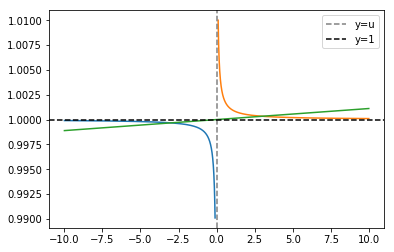

In [67]:
u = 0.001
sigma = 3
x_left_1 = np.arange(u-10, u-0.1,0.001)
x_left_2 = np.arange(u+0.1, u+10, 0.001)
y_left_1 = lhs(x_left_1, u)
y_left_2 = lhs(x_left_2, u)

x_right = np.arange(u-10, u+10, 0.001)
y_right = rhs(x_right, u, sigma)

plt.plot(x_left_1, y_left_1)
plt.plot(x_left_2, y_left_2)
plt.plot(x_right, y_right)
plt.axvline(x=u, linestyle='dashed', color='gray', label='y=u')
plt.axhline(y=1, linestyle='dashed', color='black', label='y=1')
plt.legend()

In [78]:
u=0.9
fwhm=4
sigma=fwhm / np.sqrt(8 * np.log(2))
print(sigma)
np.exp(-u**2/(2*sigma**2))

1.6986436005760381


0.8690433204285116

In [3]:
def dipole_func(x, u, fwhm):
    sigma = fwhm / np.sqrt(8 * np.log(2))
    y = 1 / sigma / np.sqrt(2 * np.pi) * ( np.exp( - 1 / 2 * (x - u)**2 / sigma**2 ) - np.exp( - 1 / 2 * x**2 / sigma**2 ) )
    return y

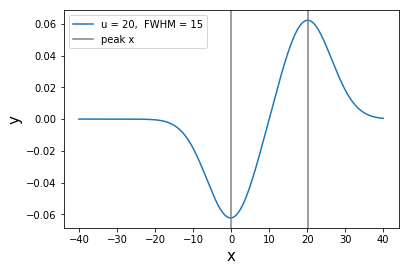

In [83]:
x = np.arange(-40,40,0.001)
u, fwhm =20, 15
y = dipole_func(x, u=u, fwhm=fwhm)
plt.plot(x, y, label=f'u = {u},  FWHM = {fwhm}')
x_min, x_max = x[np.argmin(y)], x[np.argmax(y)]
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.axvline(x=x_min, color='gray', label='peak x')
plt.axvline(x=x_max, color='gray')
plt.legend(fontsize=10);

In [82]:
x_min, x_max

(-5.634999999982444, 7.135000000033163)

In [88]:
fwhm = 8
fwhm / np.sqrt(8 * np.log(2))

3.3972872011520763

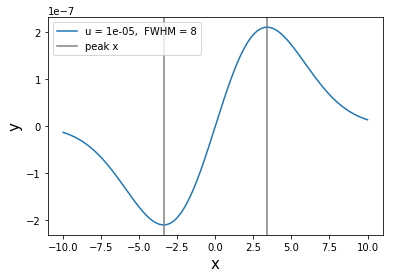

In [86]:
x = np.arange(-10,10,0.0001)
u, fwhm = 0.00001, 8
y = dipole_func(x, u=u, fwhm=fwhm)
plt.plot(x, y, label=f'u = {u},  FWHM = {fwhm}')
x_min, x_max = x[np.argmin(y)], x[np.argmax(y)]
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.axvline(x=x_min, color='gray', label='peak x')
plt.axvline(x=x_max, color='gray')
plt.legend(fontsize=10);


In [87]:
x_min, x_max

(-3.397300000015388, 3.3972999999687765)

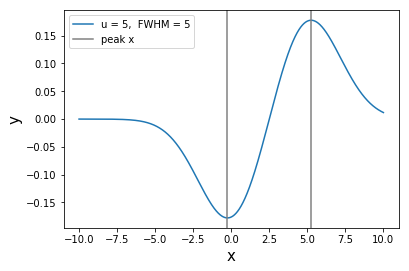

In [125]:
x = np.arange(-10,10,0.001)
u, fwhm = 5, 5
y = dipole_func(x, u=u, fwhm=5)
plt.plot(x, y, label=f'u = {u},  FWHM = {fwhm}')
x_min, x_max = x[np.argmin(y)], x[np.argmax(y)]
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.axvline(x=x_min, color='gray', label='peak x')
plt.axvline(x=x_max, color='gray')
plt.legend(fontsize=10);

Peak positions of x are slightly off the centers of the positive Gaussian and the negative Gaussian.

### 3. Weighted x of the positive lobe and the negative lobe

positive lobe: $x = \int_{\frac{u}{2}}^{+\infty} ( \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-u}{\sigma})^2} - \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x}{\sigma})^2} ) x dx$.

negative lobe: $x = \int_{-\infty}^{\frac{u}{2}} ( \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-u}{\sigma})^2} - \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x}{\sigma})^2} ) x dx$.

### 1.

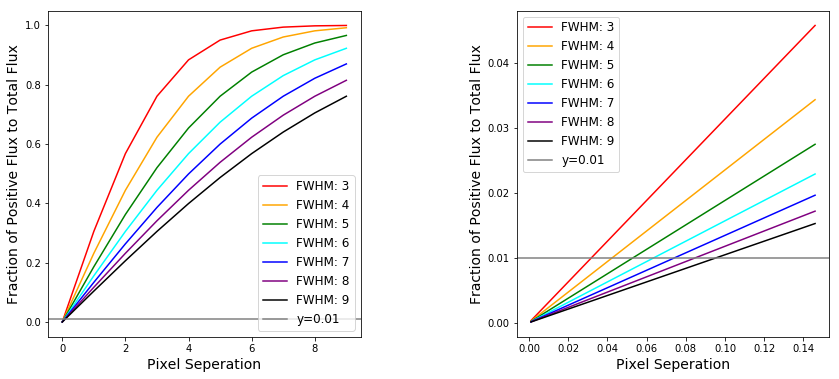

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.subplots_adjust(wspace=0.5)

u_arr_1 = np.arange(0.001, 10, 1)
u_arr_2 = np.arange(0.001, 0.15, 0.005)
plot_res_vs_fwhm(u_arr_1, ax[0])
plot_res_vs_fwhm(u_arr_2, ax[1])


In [127]:
"""
fig, ax = plt.subplots(1, 1, figsize=(8,6))
u_arr = np.arange(0.001, 0.15, 0.005)
plot_res_vs_fwhm(u_arr, ax)
""";

### 2. Peak X

In [128]:
(0.15) / 0.005

30.0

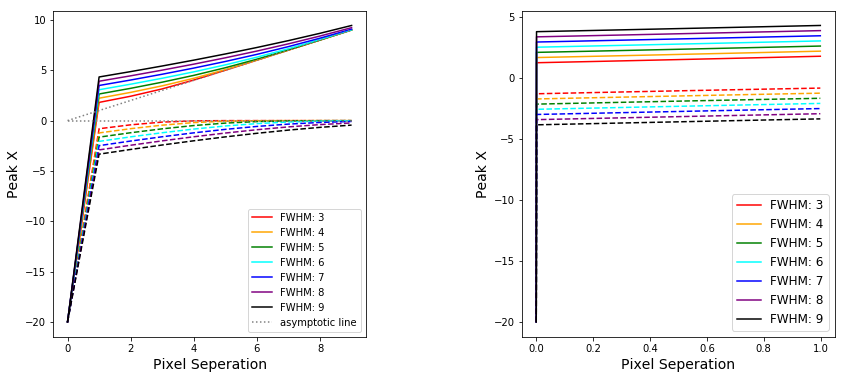

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.subplots_adjust(wspace=0.5)

u_arr_1 = np.arange(0., 10, 1)
u_arr_2 = np.arange(0., 1, 0.001)
plot_peak_x(u_arr_1, ax[0])
plot_peak_x(u_arr_2, ax[1])
ax[0].plot(u_arr_1, u_arr_1, color='gray', linestyle='dotted', label='asymptotic line')
ax[0].plot(u_arr_1, np.zeros(len(u_arr_1)), color='gray', linestyle='dotted')
ax[0].legend();

### Weighted X

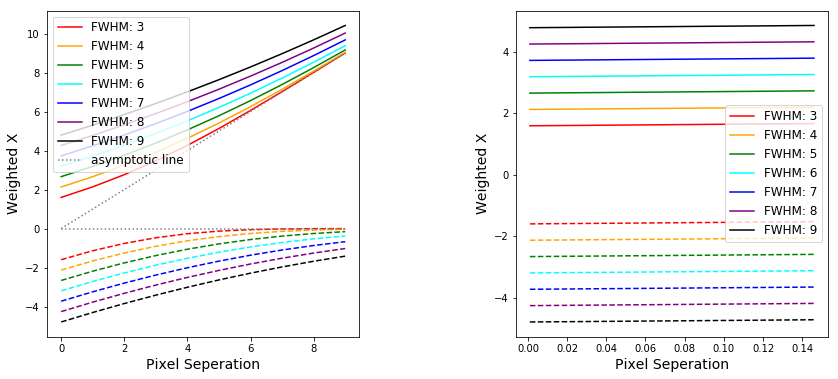

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.subplots_adjust(wspace=0.5)

u_arr_1 = np.arange(0.001, 10, 1)
u_arr_2 = np.arange(0.001, 0.15, 0.005)
plot_weighted_x(u_arr_1, ax[0])
plot_weighted_x(u_arr_2, ax[1])
ax[0].plot(u_arr_1, u_arr_1, color='gray', linestyle='dotted', label='asymptotic line')
ax[0].plot(u_arr_1, np.zeros(len(u_arr_1)), color='gray', linestyle='dotted')
ax[0].legend(fontsize=12);

### Peak X vs. Weighted X

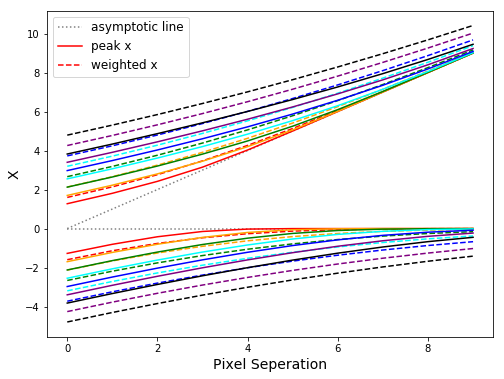

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
color_ls = ['r', 'orange', 'g', 'cyan', 'blue', 'purple', 'k']
u_arr = np.arange(0.001, 10, 1)
x_arr = np.arange(-20, 20, 0.001)

ax.plot(u_arr, u_arr, color='gray', linestyle='dotted', label='asymptotic line')
ax.plot(u_arr, np.zeros(len(u_arr)), color='gray', linestyle='dotted')

for idx, fwhm in enumerate(np.arange(3, 10)):
    peak_pos_x_ls = []
    peak_neg_x_ls = []
    weighted_pos_x_ls = []
    weighted_neg_x_ls = []
    for u in u_arr:
        flux = dipole_func(x_arr, u, fwhm)
        peak_pos_x = x_arr[np.argmax(flux)]
        peak_neg_x = x_arr[np.argmin(flux)]
        peak_pos_x_ls.append(peak_pos_x)
        peak_neg_x_ls.append(peak_neg_x)
        
        weighted_pos_x, weighted_neg_x = cal_weighted_x(u, fwhm)
        weighted_pos_x_ls.append(weighted_pos_x)
        weighted_neg_x_ls.append(weighted_neg_x)
    ax.plot(u_arr, peak_pos_x_ls, color=color_ls[idx], label = 'peak x')  
    ax.plot(u_arr, peak_neg_x_ls, color=color_ls[idx])
    ax.plot(u_arr, weighted_pos_x_ls, linestyle = 'dashed', color=color_ls[idx], label = 'weighted x')  
    ax.plot(u_arr, weighted_neg_x_ls, linestyle = 'dashed', color=color_ls[idx])
    if idx == 0:
        ax.legend(fontsize=12)
ax.set_xlabel('Pixel Seperation', size=14)
ax.set_ylabel('X', size=14);

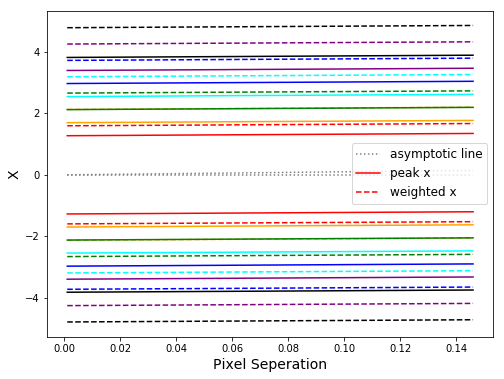

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
color_ls = ['r', 'orange', 'g', 'cyan', 'blue', 'purple', 'k']
u_arr = np.arange(0.001, 0.15, 0.005)
x_arr = np.arange(-20, 20, 0.001)

ax.plot(u_arr, u_arr, color='gray', linestyle='dotted', label='asymptotic line')
ax.plot(u_arr, np.zeros(len(u_arr)), color='gray', linestyle='dotted')

for idx, fwhm in enumerate(np.arange(3, 10)):
    peak_pos_x_ls = []
    peak_neg_x_ls = []
    weighted_pos_x_ls = []
    weighted_neg_x_ls = []
    for u in u_arr:
        flux = dipole_func(x_arr, u, fwhm)
        peak_pos_x = x_arr[np.argmax(flux)]
        peak_neg_x = x_arr[np.argmin(flux)]
        peak_pos_x_ls.append(peak_pos_x)
        peak_neg_x_ls.append(peak_neg_x)
        
        weighted_pos_x, weighted_neg_x = cal_weighted_x(u, fwhm)
        weighted_pos_x_ls.append(weighted_pos_x)
        weighted_neg_x_ls.append(weighted_neg_x)
    ax.plot(u_arr, peak_pos_x_ls, color=color_ls[idx], label = 'peak x')  
    ax.plot(u_arr, peak_neg_x_ls, color=color_ls[idx])
    ax.plot(u_arr, weighted_pos_x_ls, linestyle = 'dashed', color=color_ls[idx], label = 'weighted x')  
    ax.plot(u_arr, weighted_neg_x_ls, linestyle = 'dashed', color=color_ls[idx])
    if idx == 0:
        ax.legend(fontsize=12)
ax.set_xlabel('Pixel Seperation', size=14)
ax.set_ylabel('X', size=14);

Weighted X is larger than the peak x.